In [21]:
import pickle as pkl
from pathlib import Path

data=Path('data')
note=data/'note2.pkl'

In [ ]:
class Verifica:

    def __init__(self, materia, data, voto, semestre):
        self.materia = materia
        self.semestre = semestre
        self.data = data
        self.voto = voto

    def __str__(self):
        return f"Verifica di {self.materia} il {self.data} nel semstre {self.semestre} con voto {self.voto}"

class Materia:
    def __init__(self, nome, docente):
        self.nome = nome
        self.docente=docente
        self.verifiche = []


    def __str__(self):
        return f"Nome: {self.nome} , Docente: {self.docente}"
    
    def aggiungi_verifica(self, data, voto, semestre):
        verifica = Verifica(self.nome, data, voto, semestre)
        self.verifiche.append(verifica)
        return verifica
    
    def media_semestrale(self, semestre=1, arrotonda=True):
        if semestre == 1:
            verifiche = [verifica.voto for verifica in self.verifiche if verifica.semestre == 1]
        elif semestre == 2:
            verifiche = [verifica.voto for verifica in self.verifiche if verifica.semestre == 2]
        else:
            return False
        if verifiche:
            media = sum(verifiche) / len(verifiche)
            if arrotonda:
                return round(2*media, 0)/2
            else:
                return media
        else:
            return False
        
    def voti(self, semestre=1):
        if semestre == 1:
            return [verifica.voto for verifica in self.verifiche if verifica.semestre == 1]
        elif semestre == 2:
            return [verifica.voto for verifica in self.verifiche if verifica.semestre == 2]
        else:
            return False
        
    def df(self):
        import pandas as pd
        return pd.DataFrame({'Data': [verifica.data for verifica in self.verifiche],
                             'Voto': [verifica.voto for verifica in self.verifiche],
                             'Semestre': [verifica.semestre for verifica in self.verifiche]})
   

In [26]:
mate= Materia('Matematica', 'Rossi')

mate.aggiungi_verifica(data='2020-01-01', voto=4, semestre=1)
mate.aggiungi_verifica(data='2020-01-02', voto=4.3, semestre=1)
mate.aggiungi_verifica(data='2020-01-03', voto=5, semestre=2)




ita=Materia('Italiano', 'Bianchi')
ita.aggiungi_verifica(data='2020-01-01', voto=6, semestre=1)
ita.aggiungi_verifica(data='2020-01-02', voto=4, semestre=1)
ita.aggiungi_verifica(data='2020-01-03', voto=5, semestre=2)

materie = [mate, ita]

In [27]:
with note.open('wb') as f:
    pkl.dump(materie, f)

In [28]:
with note.open('rb') as f:
    data=pkl.load(f)
    for materia in data:
        print(materia.nome)
        print(materia.docente)
        print(materia.voti(1))
        print(materia.media_semestrale(1))
        print(materia.media_semestrale(1,arrotonda=False))
        print(materia.voti(2))
        print(materia.media_semestrale(2))
        print(materia.media_semestrale(2,arrotonda=False))
        print("-----------")
        

Matematica
Rossi
[4, 4.3]
4.0
4.15
[5]
5.0
5.0
-----------
Italiano
Bianchi
[6, 4]
5.0
5.0
[5]
5.0
5.0
-----------


In [31]:
import pandas as pd

df_all = pd.concat([materia.df() for materia in data], keys=[materia.nome for materia in data])
df_all


Data  Voto  Semestre
Matematica 0  2020-01-01   4.0         1
           1  2020-01-02   4.3         1
           2  2020-01-03   5.0         2
Italiano   0  2020-01-01   6.0         1
           1  2020-01-02   4.0         1
           2  2020-01-03   5.0         2

In [48]:
df_medie = pd.DataFrame({
    'Materia': [materia.nome for materia in data],
    'Media Semestre 1': [materia.media_semestrale(1, arrotonda=False) for materia in data],
    'Media Semestre 2': [materia.media_semestrale(2, arrotonda=False) for materia in data]})
df_medie.loc[len(df_medie)] = ['Media generale', df_medie['Media Semestre 1'].mean(), df_medie['Media Semestre 2'].mean()]
df_medie

,Materia,Media Semestre 1,Media Semestre 2
0,Matematica,4.150,5.0
1,Italiano,5.000,5.0
2,Media generale,4.575,5.0


In [49]:
sem1=round(2*df_medie['Media Semestre 1'].mean(),0)/2
print(f"Media del primo semestre: {sem1}")

Media del primo semestre: 4.5


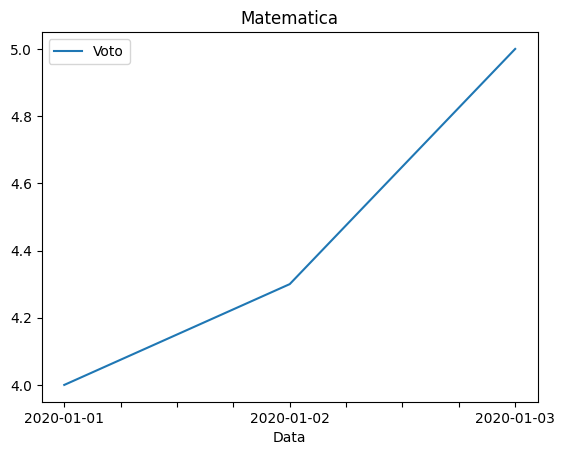

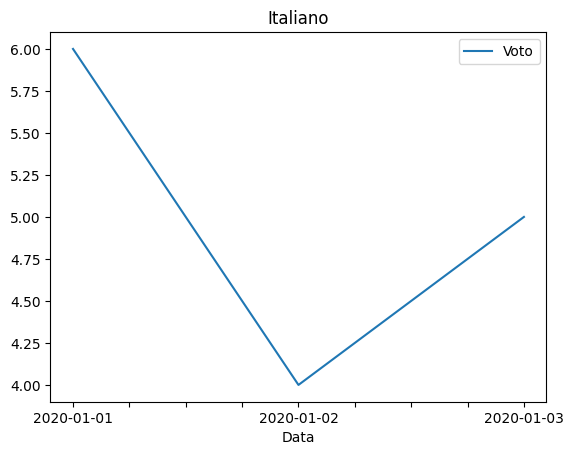

In [57]:

for materia in data:
    materia.df().plot(x='Data', y='Voto', kind='line', title=materia.nome)